In [123]:
#Масалітін Ілля Вадимович ФІТ 4-8 Лабораторна робота №5

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
import seaborn as sns

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [125]:
#Метод ліктя

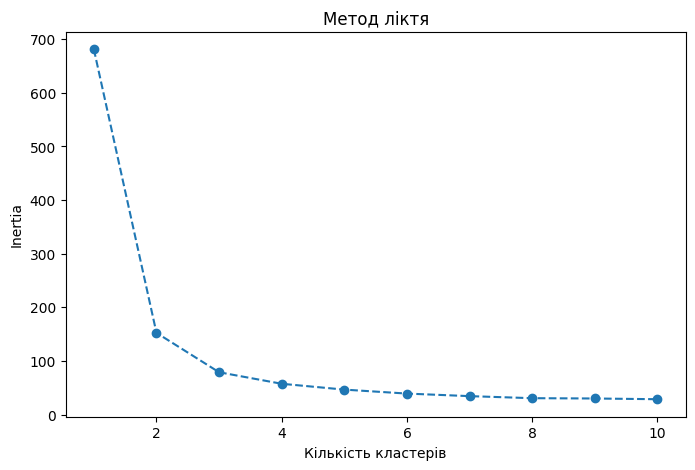

In [126]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.show()

In [127]:
#Оцінка методом силуетів

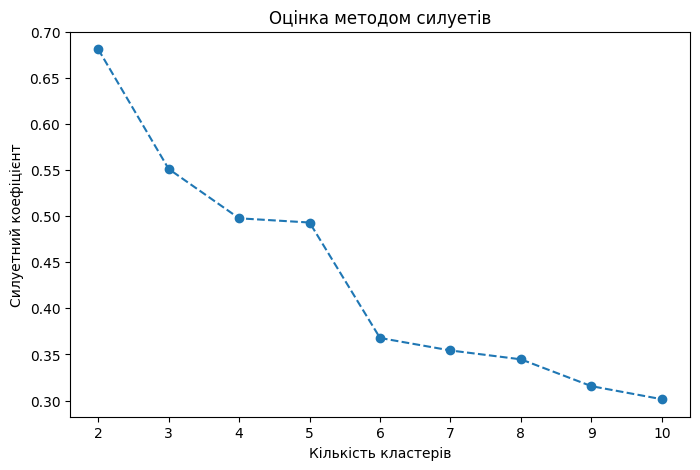

In [128]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Оцінка методом силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')
plt.show()

In [129]:
#Оптимальна кількість кластерів

In [130]:
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Оптимальна кількість кластерів за методом силуетів: {optimal_clusters}")

Оптимальна кількість кластерів за методом силуетів: 2


In [131]:
#Візуалізація кластерів

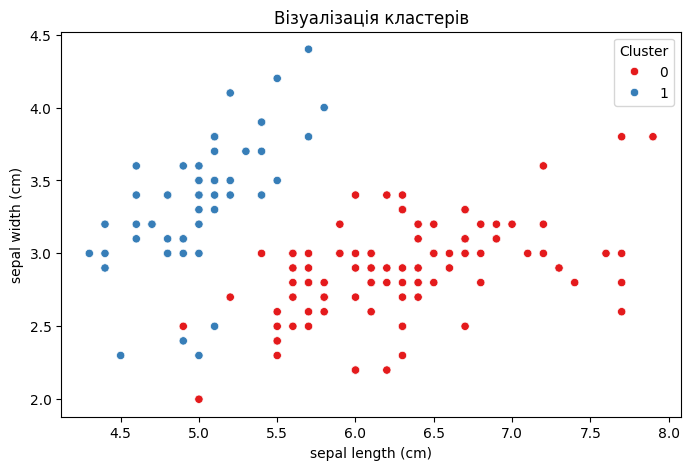

In [132]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='Cluster', palette='Set1')
plt.title('Візуалізація кластерів')
plt.show()

In [133]:
# Висновок: Завдяки методу ліктя і силуетів я визначив оптимальну кількість кластерів.

In [134]:
import pandas as pd

df_student = pd.read_csv('D:\\student-data.csv')

In [135]:
print("Перші 5 рядків:")
print(df_student.head())

Перші 5 рядків:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences passed  
0       no       no       4         3      4    1    1      3        6     no  
1      yes       no       5         3      3    1    1      3        4     no  
2      yes       no       4         3      2    2    3      3       10    yes  
3      yes      yes       3         2      2    1    1      5        2    yes  
4       no       no       4         3      2    1    2      5        4    yes  

[5 rows x 31 col

In [136]:
print("\nРозмір датасету:", df_student.shape)
print("\nТипи даних:")
print(df_student.dtypes)



Розмір датасету: (395, 31)

Типи даних:
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object


In [137]:
print("\nПеревірка на пропущені значення:")
print(df_student.isnull().sum())

numeric_cols = df_student.select_dtypes(include=[np.number]).columns
df_student[numeric_cols] = df_student[numeric_cols].fillna(df_student[numeric_cols].mean())


Перевірка на пропущені значення:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64


In [138]:
print("\nКількість дублікатів:", df_student.duplicated().sum())
df_student.drop_duplicates(inplace=True)


Кількість дублікатів: 0


In [139]:
print("\nОписова статистика:")
print(df_student.describe())



Описова статистика:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std   

In [140]:
target_column = 'passed'
if df_student[target_column].dtype in ['int64', 'float64']:
    problem_type = 'регресія'
else:
    problem_type = 'класифікація'
print("\nТип задачі:", problem_type)



Тип задачі: класифікація


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

X = df_student.drop(target_column, axis=1) 
y = df_student[target_column]  

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print("\nЛогістична регресія - Точність:", accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print("\nСлучайний ліс - Точність:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

model3 = SVC()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print("\nПідтримувальний векторний класифікатор - Точність:", accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("\nНайкращі параметри для Случайного лісу:", grid_search.best_params_)



Логістична регресія - Точність: 0.7341772151898734
              precision    recall  f1-score   support

          no       0.67      0.44      0.53        27
         yes       0.75      0.88      0.81        52

    accuracy                           0.73        79
   macro avg       0.71      0.66      0.67        79
weighted avg       0.72      0.73      0.72        79


Случайний ліс - Точність: 0.6962025316455697
              precision    recall  f1-score   support

          no       0.67      0.22      0.33        27
         yes       0.70      0.94      0.80        52

    accuracy                           0.70        79
   macro avg       0.68      0.58      0.57        79
weighted avg       0.69      0.70      0.64        79


Підтримувальний векторний класифікатор - Точність: 0.6582278481012658
              precision    recall  f1-score   support

          no       0.00      0.00      0.00        27
         yes       0.66      1.00      0.79        52

    accuracy 

C:\Users\NewUser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NewUser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NewUser\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera


Найкращі параметри для Случайного лісу: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


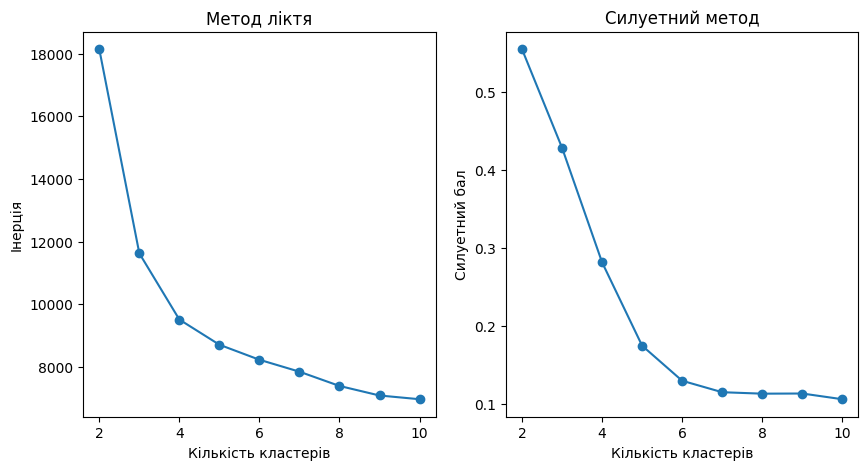

In [142]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []

for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Силуетний метод')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний бал')
plt.show()


In [ ]:
#Висновки: На основі результатів моделей і методів кластеризації я зробив висновки щодо продуктивності різних моделей, найкращих гіперпараметрів, 
#знайдених для моделі Random Forest, і оптимальної кількості кластерів, визначених за допомогою методів ліктя та силуету.